In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import re

from matplotlib.ticker import PercentFormatter

from scipy.signal import find_peaks

from IPython.display import Markdown as md
#df = pd.read_pickle('data_385k.pkl', compression='zip')
df = pd.read_pickle('CURATED_data_385k.pkl', compression='zip') # my computer is slow, i cut the tasks into slices, i have to save the work already done

In [2]:
for colname in df.columns:    
    intero = df[colname].astype(str).str.contains("\?").value_counts(dropna=False)    
    
    if True in intero.keys():
        print(f"symbol  ? detected   in column  {colname} :  \n     {intero[True]}  times ")
        print("_______________________________________________")

symbol  ? detected   in column  barcode :  
     16  times 
_______________________________________________
symbol  ? detected   in column  hundred_unit :  
     34  times 
_______________________________________________
symbol  ? detected   in column  ingredients_en :  
     45  times 
_______________________________________________
symbol  ? detected   in column  portion_unit :  
     22  times 
_______________________________________________
symbol  ? detected   in column  product_name_en :  
     13  times 
_______________________________________________
symbol  ? detected   in column  product_name_fr :  
     1  times 
_______________________________________________
symbol  ? detected   in column  unit :  
     22  times 
_______________________________________________


Symbols found, lets clean and replace "?" with np.nap values
=============================================================

In [3]:
df[["hundred_unit", "portion_unit", "unit"]] = df[["hundred_unit", "portion_unit", "unit"]].replace('?',np.nan)  
print("\n  symbol ? has been replaced by np.nan in columns hundred_unit, portion_unit, unit which fits better for processing \n\n")

pd.set_option('display.max_columns', 500)
df


  symbol ? has been replaced by np.nan in columns hundred_unit, portion_unit, unit which fits better for processing 




,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_en,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:22.908Z,359.0,179.0,kCal,1500.0,150.0,kJ,0.42,0.21,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1000,Superior quality durum wheat Pasta\r\n\r\nIngr...,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,50.0,g,NaN,NaN,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,11.00,5.50,g,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,2019-10-30T13:46:32.651Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.111Z,242.0,181.0,kCal,1010.0,758.0,kJ,18.00,13.50,g,NaN,NaN,NaN,NaN,NaN,g,0.0,0.00,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1001,"Bio Milk (Switzerland), kitchen salt",NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,75.0,g,NaN,NaN,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,19.00,14.25,g,150.0,0.50,0.38,g,11.00,8.25,g,NaN,NaN,NaN,NaN,NaN,1.50,1.13,g,g,2019-10-30T13:47:12.174Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.900Z,325.0,NaN,kCal,1358.3,NaN,kJ,12.08,NaN,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1002,100% coffee Arabica,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio,19.05,NaN,g,1000.0,0.25,NaN,g,3.03,NaN,g,NaN,NaN,NaN,NaN,NaN,0.25,NaN,g,g,2019-10-30T13:48:12.635Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:26.184Z,402.0,68.0,kCal,1679.0,285.0,kJ,7.90,1.34,g,NaN,NaN,NaN,NaN,NaN,g,9.1,1.55,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1003,"Powdered chocolate 99% (sugar, cocoa), emulsif...",NaN,NaN,NaN,NaN,NaN,mg,Na

In [4]:
df.columns

Index(['alcohol_by_volume', 'barcode', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_per_portion',
       'carbohydrates_unit', 'cholesterol_per_hundred', 'cholesterol_unit',
       'copper_cu_per_hundred', 'copper_cu_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_per_portion',
       'energy_kcal_unit', 'energy_per_hundred', 'energy_per_portion',
       'energy_unit', 'fat_per_hundred', 'fat_per_portion', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_per_hundred', 'fiber_insoluble_unit',
       'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_per_hundred',
       'folate_total_unit', 'folic_acid_per_hundred', 'folic_acid_unit',
       'hundred_unit', 'id', 'ingredients_en', 

First, i copy the names of the products in 3 languages german, english, french ; we will need it later question B8, this step will help us to simplify the code after.
=========================================================================================================================================================================

In [5]:
copy_prodnames = df[['product_name_de', 'product_name_en', 'product_name_fr']].copy(deep=True)

copy_prodnames

,product_name_de,product_name_en,product_name_fr
0,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio
1,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella
2,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio
3,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - chocolat en poudre
4,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Extra Dark Chocolate 70%,Naturaplan Chocolat extra noir 70%
...,...,...,...
374879,NaN,Nutriathletic - Whey (Swiss chocolate flavour),NaN
374880,Bourquin nutrition - Sportgetränk (Zitronenges...,NaN,Bourquin nutrition - Boisson d'effort (Goût ci...
374881,NaN,NaN,Lindt - Noir puissant 85% cacao
374882,NaN,NaN,NaN


I copy also the column ingredients_en which i will need for question C.
=======================================================================

In [6]:
copy_ingredients_en = df["ingredients_en"].copy(deep=True)

I dont want to work with calories unit, we well work with international standard which is joules .
---------------------------------------------------------------------------------------------------

Also we dont need column called unit and portion_unit for now, to simplify our snipet we delete it.
----------------------------------------------------------------------------------------------------

In [7]:
print(copy_prodnames.columns)

Index(['product_name_de', 'product_name_en', 'product_name_fr'], dtype='object')


In [8]:
df_hundreds_with_unit = df

df_hundreds_with_unit.drop(columns=["energy_kcal_per_hundred", "energy_kcal_unit", "unit", "hundred_unit", "portion_quantity", "portion_unit"], axis=1, inplace=True)

df_hundreds_with_unit

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_en,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:22.908Z,179.0,1500.0,150.0,kJ,0.42,0.21,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,Superior quality durum wheat Pasta\r\n\r\nIngr...,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,11.00,5.50,g,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-30T13:46:32.651Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.111Z,181.0,1010.0,758.0,kJ,18.00,13.50,g,NaN,NaN,NaN,NaN,NaN,g,0.0,0.00,NaN,NaN,g,NaN,NaN,NaN,NaN,1001,"Bio Milk (Switzerland), kitchen salt",NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,19.00,14.25,g,150.0,0.50,0.38,g,11.00,8.25,g,NaN,NaN,NaN,NaN,NaN,1.50,1.13,g,2019-10-30T13:47:12.174Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.900Z,NaN,1358.3,NaN,kJ,12.08,NaN,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1002,100% coffee Arabica,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio,19.05,NaN,g,1000.0,0.25,NaN,g,3.03,NaN,g,NaN,NaN,NaN,NaN,NaN,0.25,NaN,g,2019-10-30T13:48:12.635Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:26.184Z,68.0,1679.0,285.0,kJ,7.90,1.34,g,NaN,NaN,NaN,NaN,NaN,g,9.1,1.55,NaN,NaN,g,NaN,NaN,NaN,NaN,1003,"Powdered chocolate 99% (sugar, cocoa), emulsif...",NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - chocolat en poudre,6.80,1.16,g,500.0

In [9]:
float_cols = [column for column in df.columns if df.dtypes[column] == 'float']

numeric_cols = [column for column in df.columns if (df.dtypes[column] == 'float') or (df.dtypes[column] == 'int')]


categorical_cols = [column for column in df.columns if df.dtypes[column] == 'object']

In [10]:
per_hundreds_list = list()
for colname in numeric_cols:
    if colname.endswith("per_hundred"):
        per_hundreds_list.append(colname)

In [11]:
pd.set_option('display.max_columns', 500)


WE WANT TO GET A LIST OF PER_HUNDRED AND THEIR ASSOCIATED UNIT
==============================================================

In [12]:

per_hundreds_WITHUNIT_list = list()

for colname in df_hundreds_with_unit.columns:
    if colname.endswith("per_hundred"):
        per_hundreds_WITHUNIT_list.append(colname)
    if colname.endswith("unit"):
        per_hundreds_WITHUNIT_list.append(colname)

        
df_hundreds_with_unit.drop(columns=[col for col in df_hundreds_with_unit if col not in per_hundreds_WITHUNIT_list], inplace=True)
df_hundreds_with_unit

,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,energy_per_hundred,energy_unit,fat_per_hundred,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_unit,salt_per_hundred,salt_unit,saturated_fat_per_hundred,saturated_fat_unit,sodium_per_hundred,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_unit,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,NaN,NaN,75.00,g,NaN,NaN,NaN,NaN,1500.0,kJ,0.42,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.50,g,NaN,NaN,NaN,NaN,1010.0,kJ,18.00,g,NaN,NaN,NaN,NaN,NaN,g,0.0,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,g,0.50,g,11.00,g,NaN,NaN,NaN,NaN,1.50,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,52.68,g,NaN,NaN,NaN,NaN,1358.3,kJ,12.08,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,g,0.25,g,3.03,g,NaN,NaN,NaN,NaN,0.25,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,70.40,g,NaN,NaN,NaN,NaN,1679.0,kJ,7.90,g,NaN,NaN,NaN,NaN,NaN,g,9.1,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,g,NaN,NaN,4.20,g,NaN,NaN,NaN,NaN,65.80,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,37.00,g,NaN,NaN,NaN,NaN,2470.0,kJ,44.00,g,NaN,NaN,NaN,NaN,NaN,g,9.0,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,g,0.06,g,27.00,g,NaN,NaN,NaN,NaN,29.00,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374880,850.0,mg,48.60,g,NaN,NaN,NaN,NaN,1210.0,kJ,0.05,g,NaN,NaN,NaN,NaN,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,µg,NaN,NaN,875.0,mg,NaN,mg,NaN,NaN,NaN,NaN,NaN,NaN,1750.0,mg,8.25,g,NaN,NaN,NaN,NaN,635.0,g,NaN,NaN,18.50,g,NaN,NaN,18.75,µg,8.25,mg,10.5,mg,120.0,mg,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,

WE NEED TO EXTRACT THE ROOT NAMES OF PER HUNDRED COLUMNS
=========================================================

In [13]:
rootnames_perhundreds = per_hundreds_list

rootnames_perhundreds = [s.replace("per_hundred", "") for s in rootnames_perhundreds]

rootnames_perhundreds

['calcium_',
 'carbohydrates_',
 'cholesterol_',
 'copper_cu_',
 'energy_',
 'fat_',
 'fatty_acids_total_saturated_',
 'fatty_acids_total_trans_',
 'fiber_insoluble_',
 'fiber_',
 'fiber_soluble_',
 'folate_total_',
 'folic_acid_',
 'iron_',
 'magnesium_',
 'manganese_mn_',
 'monounsaturated_fatty_acids_',
 'phosphorus_',
 'polyunsaturated_fatty_acids_',
 'potassium_k_',
 'protein_',
 'salt_',
 'saturated_fat_',
 'sodium_',
 'sugars_added_',
 'sugars_',
 'vitamin_a_iu_',
 'vitamin_b12_cobalamin_',
 'vitamin_b1_thiamin_',
 'vitamin_b2_riboflavin_',
 'vitamin_b3_niacin_',
 'vitamin_b5_panthothenic_acid_',
 'vitamin_b6_pyridoxin_',
 'vitamin_c_ascorbic_acid_',
 'vitamin_d_d2_d3_international_units_',
 'zinc_']

WE HAVE TO LIST THE UNIT COLUMNS, IN ORDER TO LATER SWITCH THEM WITH RANGEMAX COLUMNS
======================================================================================

In [14]:
unit_columns_name = list()

for (columnName, columnData) in df_hundreds_with_unit.iteritems():    
    
    if columnName.endswith("unit"):
        print(columnName)
        unit_columns_name.append(columnName)

calcium_unit
carbohydrates_unit
cholesterol_unit
copper_cu_unit
energy_unit
fat_unit
fatty_acids_total_saturated_unit
fatty_acids_total_trans_unit
fiber_insoluble_unit
fiber_soluble_unit
fiber_unit
folate_total_unit
folic_acid_unit
iron_unit
magnesium_unit
manganese_mn_unit
monounsaturated_fatty_acids_unit
phosphorus_unit
polyunsaturated_fatty_acids_unit
potassium_k_unit
protein_unit
salt_unit
saturated_fat_unit
sodium_unit
sugars_added_unit
sugars_unit
vitamin_a_iu_unit
vitamin_b12_cobalamin_unit
vitamin_b1_thiamin_unit
vitamin_b2_riboflavin_unit
vitamin_b3_niacin_unit
vitamin_b5_panthothenic_acid_unit
vitamin_b6_pyridoxin_unit
vitamin_c_ascorbic_acid_unit
vitamin_d_d2_d3_international_units_unit
zinc_unit


WE NEED A DICTIONARY TO TRANSLATE UNIT KIND TO NUMERIC VALUES, WITH WHICH WE CAN CHECK IF ENTRIES DO NOT EXCEED RANGEMAX VALUES
--------------------------------------------------------------------------------------------------------------------------------

In [15]:
dico_switch_unit_rangemax = {'g' : 100.0, 'mg' : 100_000.0, 'µg' :10_000_0000.0, 'kJ' :3700.0, '1 IU Vitamin A' :330_000_000.0, '1 IU Vitamin D' : 4_000_000_000.0}

RENAMING HELPS TO FOLLOW IN WHICH STEP WE ARE NOW, THE PROCESS HAS MANY STEPS ; THE MEMORY OBJECT IS IDENTICAL, ITS NOT A DEEP COPY
------------------------------------------------------------------------------------------------------------------------------------

In [16]:
df_hundreds_with_rangemax = df_hundreds_with_unit

PREPARING NAME OF THE COLUMNS HOLDING LIMIT VALUES , WHICH WILL REPLACE THE FORMER UNIT COLUMNS
------------------------------------------------------------------------------------------------

In [17]:
rangemax_columns_name = list()

for (columnName, columnData) in df_hundreds_with_unit.iteritems():
    
    if columnName.endswith("unit"):
        newcolumnname = columnName
        newcolumnname = str(newcolumnname[:-4] + "rangemax")
        
        print(newcolumnname)
        rangemax_columns_name.append(newcolumnname)

calcium_rangemax
carbohydrates_rangemax
cholesterol_rangemax
copper_cu_rangemax
energy_rangemax
fat_rangemax
fatty_acids_total_saturated_rangemax
fatty_acids_total_trans_rangemax
fiber_insoluble_rangemax
fiber_soluble_rangemax
fiber_rangemax
folate_total_rangemax
folic_acid_rangemax
iron_rangemax
magnesium_rangemax
manganese_mn_rangemax
monounsaturated_fatty_acids_rangemax
phosphorus_rangemax
polyunsaturated_fatty_acids_rangemax
potassium_k_rangemax
protein_rangemax
salt_rangemax
saturated_fat_rangemax
sodium_rangemax
sugars_added_rangemax
sugars_rangemax
vitamin_a_iu_rangemax
vitamin_b12_cobalamin_rangemax
vitamin_b1_thiamin_rangemax
vitamin_b2_riboflavin_rangemax
vitamin_b3_niacin_rangemax
vitamin_b5_panthothenic_acid_rangemax
vitamin_b6_pyridoxin_rangemax
vitamin_c_ascorbic_acid_rangemax
vitamin_d_d2_d3_international_units_rangemax
zinc_rangemax


FIRST WE CHANGE THE CELLS  FROM KIND TO LIMIT VALUES , INSIDE THE COLUMNS CALLED *_UNIT
----------------------------------------------------------------------------------------

In [18]:
df_hundreds_with_rangemax[unit_columns_name] = df_hundreds_with_rangemax[unit_columns_name].replace(dico_switch_unit_rangemax)

In [19]:
df_hundreds_with_rangemax.tail(30)    # HERE UNIT HAVE BEEN PERMUTED WITH THEIR CORRESPONDING RANGE VALUE

,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,energy_per_hundred,energy_unit,fat_per_hundred,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_unit,salt_per_hundred,salt_unit,saturated_fat_per_hundred,saturated_fat_unit,sodium_per_hundred,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_unit,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
374854,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374855,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374856,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374857,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374858,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374859,NaN,NaN,4.90,100.0,NaN,NaN,NaN,NaN,190.0,3700.0,1.50,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,100.0,0.10,100.0,0.9,100.0,NaN,NaN,NaN,NaN,4.9,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374860,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374861,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,N

In [20]:
df_hundreds_with_rangemax[unit_columns_name].set_axis([rangemax_columns_name], axis='columns', inplace=True)

In [21]:
df_hundreds_with_rangemax.tail(30)

,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,energy_per_hundred,energy_unit,fat_per_hundred,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,potassium_k_per_hundred,potassium_k_unit,protein_per_hundred,protein_unit,salt_per_hundred,salt_unit,saturated_fat_per_hundred,saturated_fat_unit,sodium_per_hundred,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_unit,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
374854,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374855,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374856,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374857,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374858,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374859,NaN,NaN,4.90,100.0,NaN,NaN,NaN,NaN,190.0,3700.0,1.50,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,100.0,0.10,100.0,0.9,100.0,NaN,NaN,NaN,NaN,4.9,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374860,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374861,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,N

NOW WE MAKE A DICTIONARY TO TRANSLATE FORMER COLUMNS NAME FROM UNIT KIND TO THEIR ASSOCIATED LIMIT RANGEMAX
------------------------------------------------------------------------------------------------------------

In [22]:
dico_bridge_unit_rangemax = dict()

for i in range(0, len(unit_columns_name)):
    
    dico_bridge_unit_rangemax[unit_columns_name[i]] = rangemax_columns_name[i]

In [23]:
dico_bridge_unit_rangemax

{'calcium_unit': 'calcium_rangemax',
 'carbohydrates_unit': 'carbohydrates_rangemax',
 'cholesterol_unit': 'cholesterol_rangemax',
 'copper_cu_unit': 'copper_cu_rangemax',
 'energy_unit': 'energy_rangemax',
 'fat_unit': 'fat_rangemax',
 'fatty_acids_total_saturated_unit': 'fatty_acids_total_saturated_rangemax',
 'fatty_acids_total_trans_unit': 'fatty_acids_total_trans_rangemax',
 'fiber_insoluble_unit': 'fiber_insoluble_rangemax',
 'fiber_soluble_unit': 'fiber_soluble_rangemax',
 'fiber_unit': 'fiber_rangemax',
 'folate_total_unit': 'folate_total_rangemax',
 'folic_acid_unit': 'folic_acid_rangemax',
 'iron_unit': 'iron_rangemax',
 'magnesium_unit': 'magnesium_rangemax',
 'manganese_mn_unit': 'manganese_mn_rangemax',
 'monounsaturated_fatty_acids_unit': 'monounsaturated_fatty_acids_rangemax',
 'phosphorus_unit': 'phosphorus_rangemax',
 'polyunsaturated_fatty_acids_unit': 'polyunsaturated_fatty_acids_rangemax',
 'potassium_k_unit': 'potassium_k_rangemax',
 'protein_unit': 'protein_rangem

NOW WE USE THE DICTIONARY FOR RENAMING COLUMNS UNIT INTO RANGEMAX
------------------------------------------------------------------

In [24]:
df_hundreds_with_rangemax.rename(columns = dico_bridge_unit_rangemax, inplace = True)

In [25]:
df_hundreds_with_rangemax   # HERE FORMERS UNIT COLUMNS HAVE BEEN renamed x_RANGEMAX 

,calcium_per_hundred,calcium_rangemax,carbohydrates_per_hundred,carbohydrates_rangemax,cholesterol_per_hundred,cholesterol_rangemax,copper_cu_per_hundred,copper_cu_rangemax,energy_per_hundred,energy_rangemax,fat_per_hundred,fat_rangemax,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_rangemax,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_rangemax,fiber_insoluble_per_hundred,fiber_insoluble_rangemax,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_rangemax,fiber_rangemax,folate_total_per_hundred,folate_total_rangemax,folic_acid_per_hundred,folic_acid_rangemax,iron_per_hundred,iron_rangemax,magnesium_per_hundred,magnesium_rangemax,manganese_mn_per_hundred,manganese_mn_rangemax,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_rangemax,phosphorus_per_hundred,phosphorus_rangemax,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_rangemax,potassium_k_per_hundred,potassium_k_rangemax,protein_per_hundred,protein_rangemax,salt_per_hundred,salt_rangemax,saturated_fat_per_hundred,saturated_fat_rangemax,sodium_per_hundred,sodium_rangemax,sugars_added_per_hundred,sugars_added_rangemax,sugars_per_hundred,sugars_rangemax,vitamin_a_iu_per_hundred,vitamin_a_iu_rangemax,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_rangemax,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_rangemax,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_rangemax,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_rangemax,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_rangemax,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_rangemax,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_rangemax,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_rangemax,zinc_per_hundred,zinc_rangemax
0,NaN,NaN,75.00,100.0,NaN,NaN,NaN,NaN,1500.0,3700.0,0.42,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.50,100.0,NaN,NaN,NaN,NaN,1010.0,3700.0,18.00,100.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,100.0,0.50,100.0,11.00,100.0,NaN,NaN,NaN,NaN,1.50,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,52.68,100.0,NaN,NaN,NaN,NaN,1358.3,3700.0,12.08,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,100.0,0.25,100.0,3.03,100.0,NaN,NaN,NaN,NaN,0.25,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,70.40,100.0,NaN,NaN,NaN,NaN,1679.0,3700.0,7.90,100.0,NaN,NaN,NaN,NaN,NaN,100.0,9.1,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,100.0,NaN,NaN,4.20,100.0,NaN,NaN,NaN,NaN,65.80,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,37.00,100.0,NaN,NaN,NaN,NaN,2470.0,3700.0,44.00,100.0,NaN,NaN,NaN,NaN,NaN,100.0,9.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,100.0,0.06,100.0,27.00,100.0,NaN,NaN,NaN,NaN,29.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

HERE WE MAKE TWINS PAIR FOR PROCESSING PAIR COMPARISON AND LOOK FOR EXCESS
---------------------------------------------------------------------------

In [26]:
dico_bridge_per100_rangemax = dict()
for i in range(0, len(per_hundreds_list)):    
    dico_bridge_per100_rangemax[per_hundreds_list[i]] = rangemax_columns_name[i]

In [27]:
dico_bridge_per100_rangemax

{'calcium_per_hundred': 'calcium_rangemax',
 'carbohydrates_per_hundred': 'carbohydrates_rangemax',
 'cholesterol_per_hundred': 'cholesterol_rangemax',
 'copper_cu_per_hundred': 'copper_cu_rangemax',
 'energy_per_hundred': 'energy_rangemax',
 'fat_per_hundred': 'fat_rangemax',
 'fatty_acids_total_saturated_per_hundred': 'fatty_acids_total_saturated_rangemax',
 'fatty_acids_total_trans_per_hundred': 'fatty_acids_total_trans_rangemax',
 'fiber_insoluble_per_hundred': 'fiber_insoluble_rangemax',
 'fiber_per_hundred': 'fiber_soluble_rangemax',
 'fiber_soluble_per_hundred': 'fiber_rangemax',
 'folate_total_per_hundred': 'folate_total_rangemax',
 'folic_acid_per_hundred': 'folic_acid_rangemax',
 'iron_per_hundred': 'iron_rangemax',
 'magnesium_per_hundred': 'magnesium_rangemax',
 'manganese_mn_per_hundred': 'manganese_mn_rangemax',
 'monounsaturated_fatty_acids_per_hundred': 'monounsaturated_fatty_acids_rangemax',
 'phosphorus_per_hundred': 'phosphorus_rangemax',
 'polyunsaturated_fatty_acid

WE CHECK THE "Dtype" of the columns, because we want to process numeric comparison, with floats , so we check pollution by string-like object
----------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
df_hundreds_with_rangemax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374884 entries, 0 to 374883
Data columns (total 72 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   calcium_per_hundred                              264854 non-null  float64
 1   calcium_rangemax                                 264961 non-null  float64
 2   carbohydrates_per_hundred                        374884 non-null  float64
 3   carbohydrates_rangemax                           348828 non-null  float64
 4   cholesterol_per_hundred                          270282 non-null  float64
 5   cholesterol_rangemax                             270329 non-null  float64
 6   copper_cu_per_hundred                            3611 non-null    float64
 7   copper_cu_rangemax                               3611 non-null    float64
 8   energy_per_hundred                               338571 non-null  float64
 9   energy_rangemax

String_like objects detected, lets list them for transtyping it
=====================

In [29]:
object_columns__df_hundreds_with_rangemax = list(df_hundreds_with_rangemax.select_dtypes(include=['object']).columns)
object_columns__df_hundreds_with_rangemax

['vitamin_a_iu_rangemax', 'vitamin_d_d2_d3_international_units_rangemax']

In [30]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

is_numeric_dtype(df_hundreds_with_rangemax[rangemax_columns_name])

False

In [31]:
is_string_dtype(df_hundreds_with_rangemax[rangemax_columns_name])


False

In [32]:
df_hundreds_with_rangemax[object_columns__df_hundreds_with_rangemax].head(15)

,vitamin_a_iu_rangemax,vitamin_d_d2_d3_international_units_rangemax
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [33]:
df_hundreds_with_rangemax.vitamin_a_iu_rangemax.value_counts(dropna=False)

IU     192093
NaN    182791
Name: vitamin_a_iu_rangemax, dtype: int64

In [34]:
df_hundreds_with_rangemax.vitamin_d_d2_d3_international_units_rangemax.value_counts(dropna=False)

NaN    307859
IU      67025
Name: vitamin_d_d2_d3_international_units_rangemax, dtype: int64

There was a trap , in exercice type we read, but in datframe there are UI for vit A and vit D but it must be processed separately, here is a simple way to do that:
=====================================================================================================================================================================
    
VITAMINE A AND D HAVE TO BE IN UI, OTHER KIND WOULDNT MAKE SENSE, SO I FILL THEIR RESPECTIVE COLUMN WITH VALUES PROVIDED AS ENUNCIATED. 
----------------------------------------------------------------------------------------------------------------------------------------

In [35]:
# dico_switch_unit_rangemax = {'g' : 100.0, 'mg' : 100_000.0, 'µg' :10_000_0000.0, 'kJ' :3700.0, '1 IU Vitamin A' :330_000_000.0, '1 IU Vitamin D' : 4_000_000_000.0}
df_hundreds_with_rangemax["vitamin_a_iu_rangemax"] = dico_switch_unit_rangemax["1 IU Vitamin A"]
df_hundreds_with_rangemax["vitamin_d_d2_d3_international_units_rangemax"] = dico_switch_unit_rangemax["1 IU Vitamin D"]

In [36]:
df_hundreds_with_rangemax.vitamin_a_iu_rangemax.value_counts(dropna=False)



330000000.0    374884
Name: vitamin_a_iu_rangemax, dtype: int64

In [37]:
df_hundreds_with_rangemax.vitamin_d_d2_d3_international_units_rangemax.value_counts(dropna=False)

4.000000e+09    374884
Name: vitamin_d_d2_d3_international_units_rangemax, dtype: int64

We check our dataframe has rangemax columns for vitamines A and D:
---------------------------------------------------------------------

In [38]:
df_hundreds_with_rangemax[object_columns__df_hundreds_with_rangemax]

,vitamin_a_iu_rangemax,vitamin_d_d2_d3_international_units_rangemax
0,330000000.0,4.000000e+09
1,330000000.0,4.000000e+09
2,330000000.0,4.000000e+09
3,330000000.0,4.000000e+09
4,330000000.0,4.000000e+09
...,...,...
374879,330000000.0,4.000000e+09
374880,330000000.0,4.000000e+09
374881,330000000.0,4.000000e+09
374882,330000000.0,4.000000e+09


In [39]:
df_hundreds_with_rangemax

,calcium_per_hundred,calcium_rangemax,carbohydrates_per_hundred,carbohydrates_rangemax,cholesterol_per_hundred,cholesterol_rangemax,copper_cu_per_hundred,copper_cu_rangemax,energy_per_hundred,energy_rangemax,fat_per_hundred,fat_rangemax,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_rangemax,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_rangemax,fiber_insoluble_per_hundred,fiber_insoluble_rangemax,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_rangemax,fiber_rangemax,folate_total_per_hundred,folate_total_rangemax,folic_acid_per_hundred,folic_acid_rangemax,iron_per_hundred,iron_rangemax,magnesium_per_hundred,magnesium_rangemax,manganese_mn_per_hundred,manganese_mn_rangemax,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_rangemax,phosphorus_per_hundred,phosphorus_rangemax,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_rangemax,potassium_k_per_hundred,potassium_k_rangemax,protein_per_hundred,protein_rangemax,salt_per_hundred,salt_rangemax,saturated_fat_per_hundred,saturated_fat_rangemax,sodium_per_hundred,sodium_rangemax,sugars_added_per_hundred,sugars_added_rangemax,sugars_per_hundred,sugars_rangemax,vitamin_a_iu_per_hundred,vitamin_a_iu_rangemax,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_rangemax,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_rangemax,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_rangemax,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_rangemax,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_rangemax,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_rangemax,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_rangemax,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_rangemax,zinc_per_hundred,zinc_rangemax
0,NaN,NaN,75.00,100.0,NaN,NaN,NaN,NaN,1500.0,3700.0,0.42,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN
1,NaN,NaN,1.50,100.0,NaN,NaN,NaN,NaN,1010.0,3700.0,18.00,100.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,100.0,0.50,100.0,11.00,100.0,NaN,NaN,NaN,NaN,1.50,100.0,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN
2,NaN,NaN,52.68,100.0,NaN,NaN,NaN,NaN,1358.3,3700.0,12.08,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,100.0,0.25,100.0,3.03,100.0,NaN,NaN,NaN,NaN,0.25,100.0,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN
3,NaN,NaN,70.40,100.0,NaN,NaN,NaN,NaN,1679.0,3700.0,7.90,100.0,NaN,NaN,NaN,NaN,NaN,100.0,9.1,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,100.0,NaN,NaN,4.20,100.0,NaN,NaN,NaN,NaN,65.80,100.0,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN
4,NaN,NaN,37.00,100.0,NaN,NaN,NaN,NaN,2470.0,3700.0,44.00,100.0,NaN,NaN,NaN,NaN,NaN,100.0,9.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,100.0,0.06,100.0,27.00,100.0,NaN,NaN,NaN,NaN,29.00,100.0,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374879,NaN,NaN,23.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.45,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.

In [40]:
df_hundreds_with_rangemax.vitamin_a_iu_per_hundred.value_counts(dropna=False)

NaN        182791
0.0        108126
1071.0       3010
714.0        2978
357.0        2387
            ...  
1045.0          1
1258.0          1
1372.0          1
31000.0         1
1957.0          1
Name: vitamin_a_iu_per_hundred, Length: 2429, dtype: int64

In [41]:
df_hundreds_with_rangemax.vitamin_d_d2_d3_international_units_per_hundred.value_counts(dropna=False)

NaN      307860
0.0       57215
42.0       2125
47.0        472
40.0        366
          ...  
313.0         1
328.0         1
221.0         1
181.0         1
225.0         1
Name: vitamin_d_d2_d3_international_units_per_hundred, Length: 294, dtype: int64

I want to have a look of the current dataframe
-----------------------------------------------

In [42]:
df_hundreds_with_rangemax__columns = df_hundreds_with_rangemax.columns
df_hundreds_with_rangemax__columns

Index(['calcium_per_hundred', 'calcium_rangemax', 'carbohydrates_per_hundred',
       'carbohydrates_rangemax', 'cholesterol_per_hundred',
       'cholesterol_rangemax', 'copper_cu_per_hundred', 'copper_cu_rangemax',
       'energy_per_hundred', 'energy_rangemax', 'fat_per_hundred',
       'fat_rangemax', 'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_rangemax',
       'fatty_acids_total_trans_per_hundred',
       'fatty_acids_total_trans_rangemax', 'fiber_insoluble_per_hundred',
       'fiber_insoluble_rangemax', 'fiber_per_hundred',
       'fiber_soluble_per_hundred', 'fiber_soluble_rangemax', 'fiber_rangemax',
       'folate_total_per_hundred', 'folate_total_rangemax',
       'folic_acid_per_hundred', 'folic_acid_rangemax', 'iron_per_hundred',
       'iron_rangemax', 'magnesium_per_hundred', 'magnesium_rangemax',
       'manganese_mn_per_hundred', 'manganese_mn_rangemax',
       'monounsaturated_fatty_acids_per_hundred',
       'monounsaturated_fatty_

Now we have a look about np.nan cells, of after we keep in mind possible silly "Nan" strings.
---------------------------------------------------------------------------------------------

In [43]:
df_hundreds_with_rangemax.isna().sum().sum()

16577022

In [44]:
df_hundreds_with_rangemax.isin([np.nan, 'NaN']).sum()

/home/superman/anaconda3/envs/adsml/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


calcium_per_hundred                                110030
calcium_rangemax                                   109923
carbohydrates_per_hundred                               0
carbohydrates_rangemax                              26056
cholesterol_per_hundred                            104602
                                                    ...  
vitamin_c_ascorbic_acid_rangemax                   174825
vitamin_d_d2_d3_international_units_per_hundred    307860
vitamin_d_d2_d3_international_units_rangemax            0
zinc_per_hundred                                   366369
zinc_rangemax                                      366351
Length: 72, dtype: int64

In [45]:
df_hundreds_with_rangemax.isin(['NaN']).sum()

calcium_per_hundred                                0
calcium_rangemax                                   0
carbohydrates_per_hundred                          0
carbohydrates_rangemax                             0
cholesterol_per_hundred                            0
                                                  ..
vitamin_c_ascorbic_acid_rangemax                   0
vitamin_d_d2_d3_international_units_per_hundred    0
vitamin_d_d2_d3_international_units_rangemax       0
zinc_per_hundred                                   0
zinc_rangemax                                      0
Length: 72, dtype: int64

In [46]:
df_hundreds_with_rangemax.isin([np.nan]).sum()

calcium_per_hundred                                110030
calcium_rangemax                                   109923
carbohydrates_per_hundred                               0
carbohydrates_rangemax                              26056
cholesterol_per_hundred                            104602
                                                    ...  
vitamin_c_ascorbic_acid_rangemax                   174825
vitamin_d_d2_d3_international_units_per_hundred    307860
vitamin_d_d2_d3_international_units_rangemax            0
zinc_per_hundred                                   366369
zinc_rangemax                                      366351
Length: 72, dtype: int64

check if presence of negative values in *_per_hundred
-------------------------------------------------------

In [47]:
(df_hundreds_with_rangemax < 0).sum().sum()            

0

now , we check excess values
-----------------------------

In [48]:
for rn in rootnames_perhundreds:
    
    excess_column_name = rn + "excess"    
    current_per_hundred = rn + "per_hundred"    
    current_rangemax = rn + "rangemax"   
    
    df_hundreds_with_rangemax[excess_column_name] = np.where(df_hundreds_with_rangemax[current_per_hundred] > df_hundreds_with_rangemax[current_rangemax], True, False)

In [49]:
df_hundreds_with_rangemax

,calcium_per_hundred,calcium_rangemax,carbohydrates_per_hundred,carbohydrates_rangemax,cholesterol_per_hundred,cholesterol_rangemax,copper_cu_per_hundred,copper_cu_rangemax,energy_per_hundred,energy_rangemax,fat_per_hundred,fat_rangemax,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_rangemax,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_rangemax,fiber_insoluble_per_hundred,fiber_insoluble_rangemax,fiber_per_hundred,fiber_soluble_per_hundred,fiber_soluble_rangemax,fiber_rangemax,folate_total_per_hundred,folate_total_rangemax,folic_acid_per_hundred,folic_acid_rangemax,iron_per_hundred,iron_rangemax,magnesium_per_hundred,magnesium_rangemax,manganese_mn_per_hundred,manganese_mn_rangemax,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_rangemax,phosphorus_per_hundred,phosphorus_rangemax,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_rangemax,potassium_k_per_hundred,potassium_k_rangemax,protein_per_hundred,protein_rangemax,salt_per_hundred,salt_rangemax,saturated_fat_per_hundred,saturated_fat_rangemax,sodium_per_hundred,sodium_rangemax,sugars_added_per_hundred,sugars_added_rangemax,sugars_per_hundred,sugars_rangemax,vitamin_a_iu_per_hundred,vitamin_a_iu_rangemax,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_rangemax,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_rangemax,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_rangemax,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_rangemax,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_rangemax,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_rangemax,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_rangemax,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_rangemax,zinc_per_hundred,zinc_rangemax,calcium_excess,carbohydrates_excess,cholesterol_excess,copper_cu_excess,energy_excess,fat_excess,fatty_acids_total_saturated_excess,fatty_acids_total_trans_excess,fiber_insoluble_excess,fiber_excess,fiber_soluble_excess,folate_total_excess,folic_acid_excess,iron_excess,magnesium_excess,manganese_mn_excess,monounsaturated_fatty_acids_excess,phosphorus_excess,polyunsaturated_fatty_acids_excess,potassium_k_excess,protein_excess,salt_excess,saturated_fat_excess,sodium_excess,sugars_added_excess,sugars_excess,vitamin_a_iu_excess,vitamin_b12_cobalamin_excess,vitamin_b1_thiamin_excess,vitamin_b2_riboflavin_excess,vitamin_b3_niacin_excess,vitamin_b5_panthothenic_acid_excess,vitamin_b6_pyridoxin_excess,vitamin_c_ascorbic_acid_excess,vitamin_d_d2_d3_international_units_excess,zinc_excess
0,NaN,NaN,75.00,100.0,NaN,NaN,NaN,NaN,1500.0,3700.0,0.42,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,1.50,100.0,NaN,NaN,NaN,NaN,1010.0,3700.0,18.00,100.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,100.0,0.50,100.0,11.00,100.0,NaN,NaN,NaN,NaN,1.50,100.0,NaN,330000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+09,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,52.68,100.0,NaN,NaN,NaN,NaN,1358.3,3700.0,12.08,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,100.0,0.25,100.0,3.03,100.0,NaN,NaN,NaN,NaN,0.25,100.0,NaN,330000000.0,NaN,NaN,NaN,Na

In [50]:
def count_excess_per_feature(dataframe):
    TOTAL_EXCESS_ALL_FEATURES = 0
    ROWS = dataframe.shape[0]
    list_cols_excess = []

    for colname in dataframe.columns:
        if colname.endswith("excess"):
            list_cols_excess.append(colname)
            rn = colname[:-7]
            hundred_name = rn + "_per_hundred"
            print(f" ______________\n {colname}             rootname {rn}            \n\n  {dataframe[colname].value_counts(dropna=False)}")
            try:
                print(f" \n     \x1b[31m  EXCESS VALUES DETECTED :  {dataframe[colname].value_counts(dropna=False)[True]}   feature  {hundred_name}  \x1b[0m !!!")
                TOTAL_EXCESS_ALL_FEATURES += dataframe[colname].value_counts(dropna=False)[True]
            except KeyError:
                pass

    EXCESS_percent = (TOTAL_EXCESS_ALL_FEATURES/ROWS)*100
    print(f"\n\n     Percentage of rows having excess in at least one feature is {EXCESS_percent} %     ,  TOTAL EXCESS DETECTED  {TOTAL_EXCESS_ALL_FEATURES}")

In [51]:
excess_before_nanify = count_excess_per_feature(df_hundreds_with_rangemax)

 ______________
 calcium_excess             rootname calcium            

  False    374866
True         18
Name: calcium_excess, dtype: int64
 
       EXCESS VALUES DETECTED :  18   feature  calcium_per_hundred   !!!
 ______________
 carbohydrates_excess             rootname carbohydrates            

  False    373808
True       1076
Name: carbohydrates_excess, dtype: int64
 
       EXCESS VALUES DETECTED :  1076   feature  carbohydrates_per_hundred   !!!
 ______________
 cholesterol_excess             rootname cholesterol            

  False    374862
True         22
Name: cholesterol_excess, dtype: int64
 
       EXCESS VALUES DETECTED :  22   feature  cholesterol_per_hundred   !!!
 ______________
 copper_cu_excess             rootname copper_cu            

  False    374884
Name: copper_cu_excess, dtype: int64
 ______________
 energy_excess             rootname energy            

  False    374055
True        829
Name: energy_excess, dtype: int64
 
       EXCESS VALUES DETECTED

Now we adress the subset having at least one excess column True
---------------------------------------------------------------

In [52]:
excess_cols = [col for col in df.columns if col.endswith("excess")] # list of columns which names ends with "excess"


def give_excess_subset(dataframe):
    global excess_cols #read only
    return dataframe[dataframe[excess_cols].any(axis=1)]

excess_subset = give_excess_subset(df_hundreds_with_rangemax)


Showing as an example the 3 first products with "calcium_per_hundred" excess detected  
--------------------------------------------------------------------------------------

In [53]:
print(" \n\n __________ showing three first calcium_per_hundred  excess  from subset 'excess_subset' _____________________________ \n\n ")
           
filtered_calcium_excess = excess_subset[excess_subset['calcium_excess'] == True][:3]
print(filtered_calcium_excess[["calcium_per_hundred",  "calcium_rangemax"]])

 

 __________ showing three first calcium_per_hundred  excess  from subset 'excess_subset' _____________________________ 

 
        calcium_per_hundred  calcium_rangemax
343445             240000.0          100000.0
343644             517857.0          100000.0
343645             532143.0          100000.0


Finding the names of the first row having calcium excess:
-------------------------------------------------------

In [54]:
#copy_prodnames.loc[copy_prodnames['calcium_per_hundred'] == 5747.000000] # spiruline, prot per 100 = 5747 malgres protein unit exprimee en g.
copy_prodnames.iloc[343445] # spiruline, prot per 100 = 5747 malgres protein unit exprimee en g.

product_name_de                          NaN
product_name_en    WEST AFRICAN PARADISE RUB
product_name_fr                          NaN
Name: 343445, dtype: object

In [55]:
md(f" <h1><center><strong> We find  <font color='red'> {copy_prodnames.iloc[343445].product_name_en} </font> as the first row having calcium excess </strong></center></h1>")

 <h1><center><strong> We find  <font color='red'> WEST AFRICAN PARADISE RUB </font> as the first row having calcium excess </strong></center></h1>

In [56]:
def make_per100feature_fixed_with_nan(dataframe):
    
    for colname in dataframe.columns:
        if colname.endswith("excess"):
            rootname = colname[:-7]
            per100feature = rootname + "_per_hundred"
            per100feature_fixed = per100feature + "_fixed_with_nan"
            
            dataframe[per100feature_fixed] = np.where(dataframe[colname]== True, np.nan, dataframe[per100feature])

we execute "make_per100feature_fixed_with_nan" : we fill up the "*_fixed_with_nan" columns with nan if the "*_per_hundred" corresponding value is in excess, otherwise we 
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

keep the original value
------------------------

In [57]:
make_per100feature_fixed_with_nan(df_hundreds_with_rangemax)

now we fix on place : "*_per_hundred" columns are copy of "*_fixed_with_nan" columns
-------------------------------------------------------------------------------------

In [58]:
def fix_per100_inplace(dataframe):
    
    for colname in dataframe.columns:
        if colname.endswith("_per_hundred"):

            per100feature_fixed = colname + "_fixed_with_nan"
            
            dataframe[colname] = dataframe[per100feature_fixed]

In [59]:
fix_per100_inplace(df_hundreds_with_rangemax)

after execution fix_per100_inplace
----------------------------------

Here we drop the columns whose name ends with "excess"
------------------------------------------------------

In [60]:
excess_cols_names = [colname for colname in df_hundreds_with_rangemax.columns if colname.endswith("excess")]          
df_hundreds_with_rangemax.drop(excess_cols_names, axis=1, inplace=True)

now that we have removed remove all the excess columns which was indicators, and we rebuild fresh ones.
-------------------------------------------------------------------------------------------------------

In [61]:
def make_excess_cols(my_dataframe=df):
    for col in my_dataframe.columns:
        if col.endswith("per_hundred"):
            excess_col = col.replace("per_hundred", "excess")
            range_max_col = col.replace("per_hundred", "rangemax")
            my_dataframe[excess_col] = my_dataframe[col] > my_dataframe[range_max_col]            

In [62]:
make_excess_cols(df_hundreds_with_rangemax)

Now we count again the excess, should be zero.
-----------------------------------------------

In [63]:
excess_AFTER_nanify = count_excess_per_feature(df_hundreds_with_rangemax)    # !!!!!!!!!!!

 ______________
 calcium_excess             rootname calcium            

  False    374884
Name: calcium_excess, dtype: int64
 ______________
 carbohydrates_excess             rootname carbohydrates            

  False    374884
Name: carbohydrates_excess, dtype: int64
 ______________
 cholesterol_excess             rootname cholesterol            

  False    374884
Name: cholesterol_excess, dtype: int64
 ______________
 copper_cu_excess             rootname copper_cu            

  False    374884
Name: copper_cu_excess, dtype: int64
 ______________
 energy_excess             rootname energy            

  False    374884
Name: energy_excess, dtype: int64
 ______________
 fat_excess             rootname fat            

  False    374884
Name: fat_excess, dtype: int64
 ______________
 fatty_acids_total_saturated_excess             rootname fatty_acids_total_saturated            

  False    374884
Name: fatty_acids_total_saturated_excess, dtype: int64
 ______________
 fatty_acids_t

B7 - Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?
===============================================================================================================================================

In [64]:
df_hundreds_with_rangemax["macros_saltfiber_sum"] = df_hundreds_with_rangemax["protein_per_hundred"].fillna(0) + df_hundreds_with_rangemax["fat_per_hundred"].fillna(0) + df_hundreds_with_rangemax["carbohydrates_per_hundred"].fillna(0) + df_hundreds_with_rangemax["salt_per_hundred"].fillna(0) + df_hundreds_with_rangemax["fiber_soluble_per_hundred"].fillna(0) + df_hundreds_with_rangemax["fiber_insoluble_per_hundred"].fillna(0)

In [65]:
macro_per100_features_names = ["protein_per_hundred", "fat_per_hundred", "carbohydrates_per_hundred", "salt_per_hundred", "fiber_soluble_per_hundred", "fiber_insoluble_per_hundred","macros_saltfiber_sum"]

df_hundreds_with_rangemax[macro_per100_features_names].head(10)

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_soluble_per_hundred,fiber_insoluble_per_hundred,macros_saltfiber_sum
0,11.00,0.42,75.00,NaN,NaN,NaN,86.42
1,19.00,18.00,1.50,0.50,NaN,NaN,39.00
2,19.05,12.08,52.68,0.25,NaN,NaN,84.06
3,6.80,7.90,70.40,NaN,NaN,NaN,85.10
4,8.00,44.00,37.00,0.06,NaN,NaN,89.06
5,19.50,21.00,11.10,NaN,NaN,NaN,51.60
6,5.60,29.50,60.50,0.15,NaN,NaN,95.75
7,13.00,1.50,70.00,0.00,NaN,NaN,84.50
8,0.50,0.00,80.00,0.00,NaN,NaN,80.50
9,8.20,24.60,61.60,0.45,NaN,NaN,94.85


In [66]:
macro_excess = df_hundreds_with_rangemax["macros_saltfiber_sum"] > 100.0
    
print(macro_excess.value_counts(dropna=False))

print(type(macro_excess.value_counts(dropna=False)))

print(macro_excess.value_counts(dropna=False)[True])

over_sum_macros_saltfiber_sum = macro_excess.value_counts(dropna=False)[True]

False    370767
True       4117
Name: macros_saltfiber_sum, dtype: int64
<class 'pandas.core.series.Series'>
4117


In [67]:
md(f" <h1><center><strong> We find  <font color='red'> {over_sum_macros_saltfiber_sum} </font> entries with impossible values, with excedent when adding protein,carbohydrates,fat,salt and fibers per hundreds </strong></center></h1>")

 <h1><center><strong> We find  <font color='red'> 4117 </font> entries with impossible values, with excedent when adding protein,carbohydrates,fat,salt and fibers per hundreds </strong></center></h1>

In [68]:
macro_lack = df_hundreds_with_rangemax["macros_saltfiber_sum"] <= 0.0
    
print(macro_lack.value_counts(dropna=False))

under_sum_macro_lack = macro_lack.value_counts(dropna=False)[True]

False    361643
True      13241
Name: macros_saltfiber_sum, dtype: int64


In [69]:
md(f" <h1><center><strong> We find  <font color='red'> {under_sum_macro_lack} </font>  entries with impossible values, with too low values when adding protein,carbohydrates,fat,salt and fibers per hundreds </strong></center></h1>")

 <h1><center><strong> We find  <font color='red'> 13241 </font>  entries with impossible values, with too low values when adding protein,carbohydrates,fat,salt and fibers per hundreds </strong></center></h1>

In [70]:
print("minimum macros nutrients sum found :  ",df_hundreds_with_rangemax["macros_saltfiber_sum"].min())

print("maximum macros nutrients sum found :  ",df_hundreds_with_rangemax["macros_saltfiber_sum"].max())

minimum macros nutrients sum found :   0.0
maximum macros nutrients sum found :   237.5


In [71]:
print("mean macros nutrients sum found :  ", round(df_hundreds_with_rangemax["macros_saltfiber_sum"].mean(),2), " grams per hundred")

mean macros nutrients sum found :   51.63  grams per hundred


Lets get the id of rows with  macro excedent
---------------------------------------------

In [72]:
entries_id_exceeding_macros = df_hundreds_with_rangemax[df_hundreds_with_rangemax['macros_saltfiber_sum'].gt(100.0)].index

print(entries_id_exceeding_macros)

Int64Index([   291,    321,    472,    474,    905,    927,    932,   1084,
              1871,   3465,
            ...
            372326, 372333, 372550, 372700, 372847, 372877, 373049, 373139,
            373211, 373307],
           dtype='int64', length=4117)


In [73]:
entries_id_exceeding_macros_list = entries_id_exceeding_macros.to_list()

entries_id_exceeding_macros_slice_10 = entries_id_exceeding_macros_list[:10]

In [74]:
md(f" <h1><center><strong>  Id of the ten first entries having macros excedent :  <font color='red'> {entries_id_exceeding_macros_slice_10} </font>  </strong></center></h1>")

 <h1><center><strong>  Id of the ten first entries having macros excedent :  <font color='red'> [291, 321, 472, 474, 905, 927, 932, 1084, 1871, 3465] </font>  </strong></center></h1>

Here we list the rows with macros excedent over 100g per hundreds , lets have a look on the ten first corrupted rows:
---------------------------------------------------------------------------------------------------------------------

In [75]:
df_hundreds_with_rangemax[macro_per100_features_names].iloc[entries_id_exceeding_macros_slice_10]

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_soluble_per_hundred,fiber_insoluble_per_hundred,macros_saltfiber_sum
291,0.50,0.50,99.00,0.01,NaN,NaN,100.01
321,2.50,26.00,71.00,2.40,NaN,NaN,101.90
472,4.50,100.00,23.53,NaN,NaN,NaN,128.03
474,4.50,100.00,23.53,NaN,NaN,NaN,128.03
905,0.40,100.00,23.53,0.01,NaN,NaN,123.94
927,0.00,0.00,100.00,0.08,NaN,NaN,100.08
932,0.00,0.00,100.00,0.08,NaN,NaN,100.08
1084,0.00,100.00,0.00,0.05,NaN,NaN,100.05
1871,7.00,34.00,59.00,0.20,NaN,NaN,100.20
3465,6.34,24.51,69.08,0.20,NaN,NaN,100.13


In [76]:
df_hundreds_with_rangemax[df_hundreds_with_rangemax['macros_saltfiber_sum'].lt(0.0)].index

Int64Index([], dtype='int64')

There is no row having macros sum with negative values
-------------------------------------------------------

Lets have an overview about proteins, carbohydrates and fat per hundred features
--------------------------------------------------------------------------------

In [77]:
df_hundreds_with_rangemax.describe().loc[:, ['protein_per_hundred', 'carbohydrates_per_hundred', 'fat_per_hundred']]

,protein_per_hundred,carbohydrates_per_hundred,fat_per_hundred
count,374712.000000,373808.000000,374748.000000
mean,6.961945,32.609657,12.033418
std,8.355855,28.254902,16.376886
min,0.000000,0.000000,0.000000
25%,0.710000,7.140000,0.000000
50%,4.500000,23.530000,5.450000
75%,9.680000,57.140000,18.180000
max,100.000000,100.000000,100.000000


As expected, no value over 100g per hundred 
---------------------------------------------

In [78]:
print("minimum macros nutrients sum found :  ",df_hundreds_with_rangemax["macros_saltfiber_sum"].min())

print("maximum macros nutrients sum found :  ",df_hundreds_with_rangemax["macros_saltfiber_sum"].max())

minimum macros nutrients sum found :   0.0
maximum macros nutrients sum found :   237.5


In [79]:
print("mean macros nutrients sum found :  ", round(df_hundreds_with_rangemax["macros_saltfiber_sum"].mean(),2), " grams per hundred")

mean macros nutrients sum found :   51.63  grams per hundred


In [80]:
entries_id_exceeding_macros_list = entries_id_exceeding_macros.to_list()

entries_id_exceeding_macros_slice_10 = entries_id_exceeding_macros_list[:10]

print(f" Id of the ten first entries having macros excedent :    {entries_id_exceeding_macros_slice_10}")

 Id of the ten first entries having macros excedent :    [291, 321, 472, 474, 905, 927, 932, 1084, 1871, 3465]


Here we did list the rows with macros excedent over 100g per hundreds , lets have a look on the ten first corrupted rows:
---------------------------------------------------------------------------------------------------------------------

In [81]:
df_hundreds_with_rangemax[macro_per100_features_names].iloc[entries_id_exceeding_macros_slice_10]

,protein_per_hundred,fat_per_hundred,carbohydrates_per_hundred,salt_per_hundred,fiber_soluble_per_hundred,fiber_insoluble_per_hundred,macros_saltfiber_sum
291,0.50,0.50,99.00,0.01,NaN,NaN,100.01
321,2.50,26.00,71.00,2.40,NaN,NaN,101.90
472,4.50,100.00,23.53,NaN,NaN,NaN,128.03
474,4.50,100.00,23.53,NaN,NaN,NaN,128.03
905,0.40,100.00,23.53,0.01,NaN,NaN,123.94
927,0.00,0.00,100.00,0.08,NaN,NaN,100.08
932,0.00,0.00,100.00,0.08,NaN,NaN,100.08
1084,0.00,100.00,0.00,0.05,NaN,NaN,100.05
1871,7.00,34.00,59.00,0.20,NaN,NaN,100.20
3465,6.34,24.51,69.08,0.20,NaN,NaN,100.13


In [82]:
df_hundreds_with_rangemax[df_hundreds_with_rangemax['macros_saltfiber_sum'].lt(0.0)].index

Int64Index([], dtype='int64')

There is no row having macros sum with negative values
-------------------------------------------------------

Lets have an overview about proteins, carbohydrates and fat per hundred features
--------------------------------------------------------------------------------

In [83]:
df_hundreds_with_rangemax.describe().loc[:, ['protein_per_hundred', 'carbohydrates_per_hundred', 'fat_per_hundred']]

,protein_per_hundred,carbohydrates_per_hundred,fat_per_hundred
count,374712.000000,373808.000000,374748.000000
mean,6.961945,32.609657,12.033418
std,8.355855,28.254902,16.376886
min,0.000000,0.000000,0.000000
25%,0.710000,7.140000,0.000000
50%,4.500000,23.530000,5.450000
75%,9.680000,57.140000,18.180000
max,100.000000,100.000000,100.000000


What is the food product having so much protein ? lets have a look on it:
--------------------------------------------------------------------------

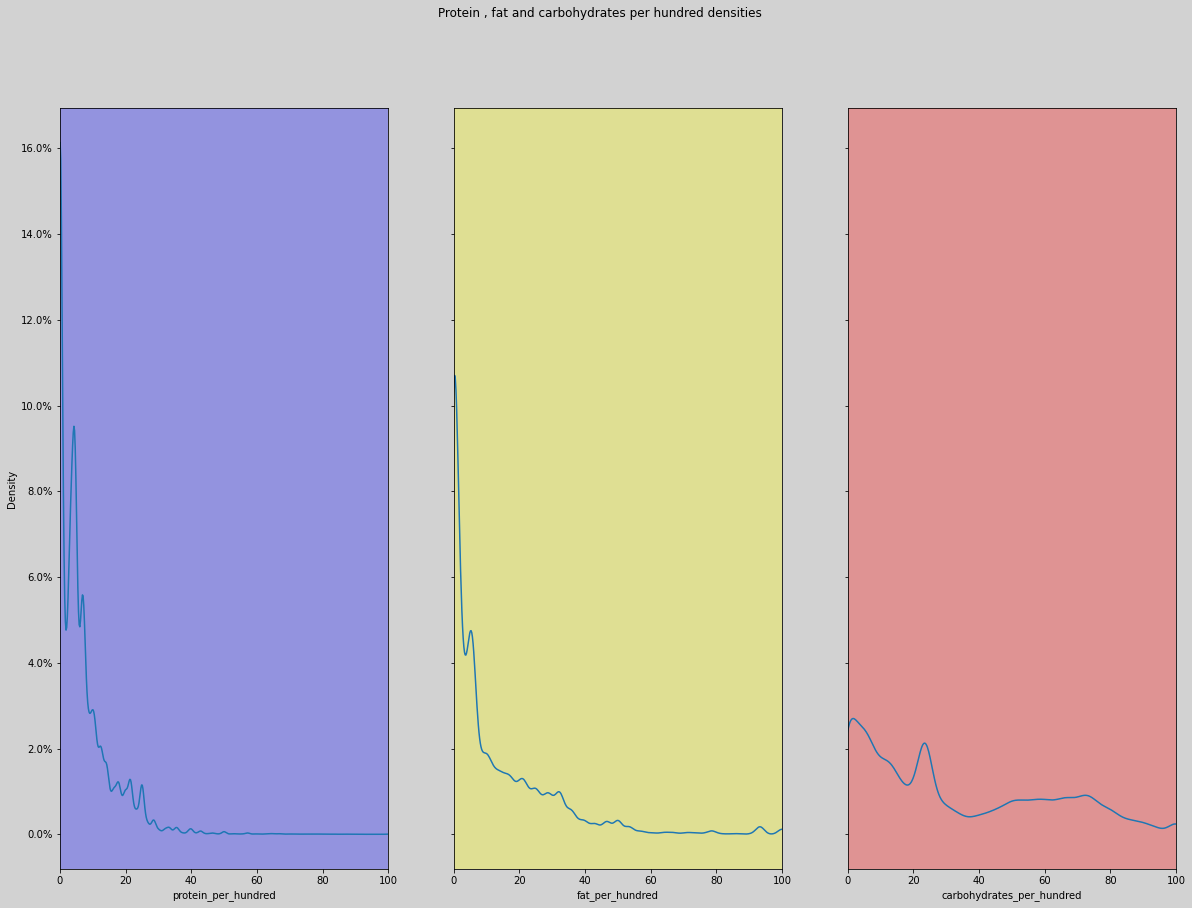

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(20, 14), sharey=True)

fig.suptitle('Protein , fat and carbohydrates per hundred densities')

fig.patch.set_facecolor('grey')
fig.patch.set_alpha(0.35)

# Premier sous-graphique
ax[0].set_xlabel('protein_per_hundred')
ax[0].set_ylabel('Density')
ax[0].set_xlim(0, 100)
ax[0].set_facecolor('blue')
ax[0].patch.set_alpha(0.3)


#df['protein_per_hundred'].plot(kind='kde', ax=ax[0])
df_hundreds_with_rangemax['protein_per_hundred'].plot(kind='kde', ax=ax[0])

ax[0].yaxis.set_major_formatter(PercentFormatter(1))

# Deuxième sous-graphique
ax[1].set_xlabel('fat_per_hundred')
ax[1].set_xlim(0, 100)
ax[1].set_facecolor('yellow')
ax[1].patch.set_alpha(0.3)
#df['fat_per_hundred'].plot(kind='kde', ax=ax[1])
df_hundreds_with_rangemax['fat_per_hundred'].plot(kind='kde', ax=ax[1])

ax[1].yaxis.set_major_formatter(PercentFormatter(1))

# Troisième sous-graphique
ax[2].set_xlabel('carbohydrates_per_hundred')
ax[2].set_xlim(0, 100)
ax[2].set_facecolor('red')
ax[2].patch.set_alpha(0.3)
#df['carbohydrates_per_hundred'].plot(kind='kde', ax=ax[2])
df_hundreds_with_rangemax['carbohydrates_per_hundred'].plot(kind='kde', ax=ax[2])

ax[2].yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

Another way to display ...
---------------------------

Text(0.5, 1.0, 'distribution of number of entries and their content for protein in grams')

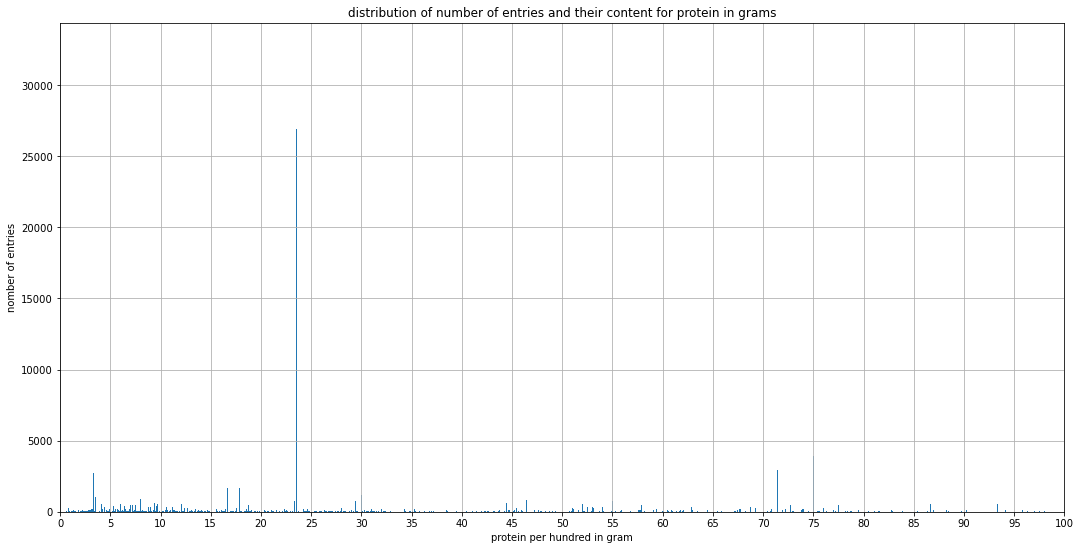

In [85]:
drawcarb3 =df_hundreds_with_rangemax['carbohydrates_per_hundred'].hist(bins=5000, figsize=(18,9));

drawcarb3.set_xlim(0, 100)

drawcarb3.set_xticks(range(0,105,5))

drawcarb3.set_xlabel("protein per hundred in gram")    # verifier que tout le monde est en gr !!!!!!!!!!!

drawcarb3.set_ylabel("nomber of entries")

drawcarb3.set_title("distribution of number of entries and their content for protein in grams")

In [86]:
pd.set_option('display.max_rows', None)

print("Feature                                           % of null value")
print("=============================================== + ================ \n")
print(df_hundreds_with_rangemax.isnull().mean() * 100)

Feature                                           % of null value
=============================================== + ================ 

calcium_per_hundred                                               29.355214
calcium_rangemax                                                  29.321870
carbohydrates_per_hundred                                          0.287022
carbohydrates_rangemax                                             6.950417
cholesterol_per_hundred                                           27.908366
cholesterol_rangemax                                              27.889961
copper_cu_per_hundred                                             99.036769
copper_cu_rangemax                                                99.036769
energy_per_hundred                                                 9.907598
energy_rangemax                                                    9.636314
fat_per_hundred                                                    0.036278
fat_rangemax                 

B8 part 1 : removing recording errors from the per_hundred columns
===================================================================

B8 part 2 :  pick a few variables from the per_hundred list and address outliers.
===================================================================================

lets have an overview over some important per_hundreds features ...
---------------------------------------------------------------------

[Text(0, 0.5, 'grams per hundred'),
 Text(0.5, 1.0, 'boxplot of macronutriments, fiber and salt')]

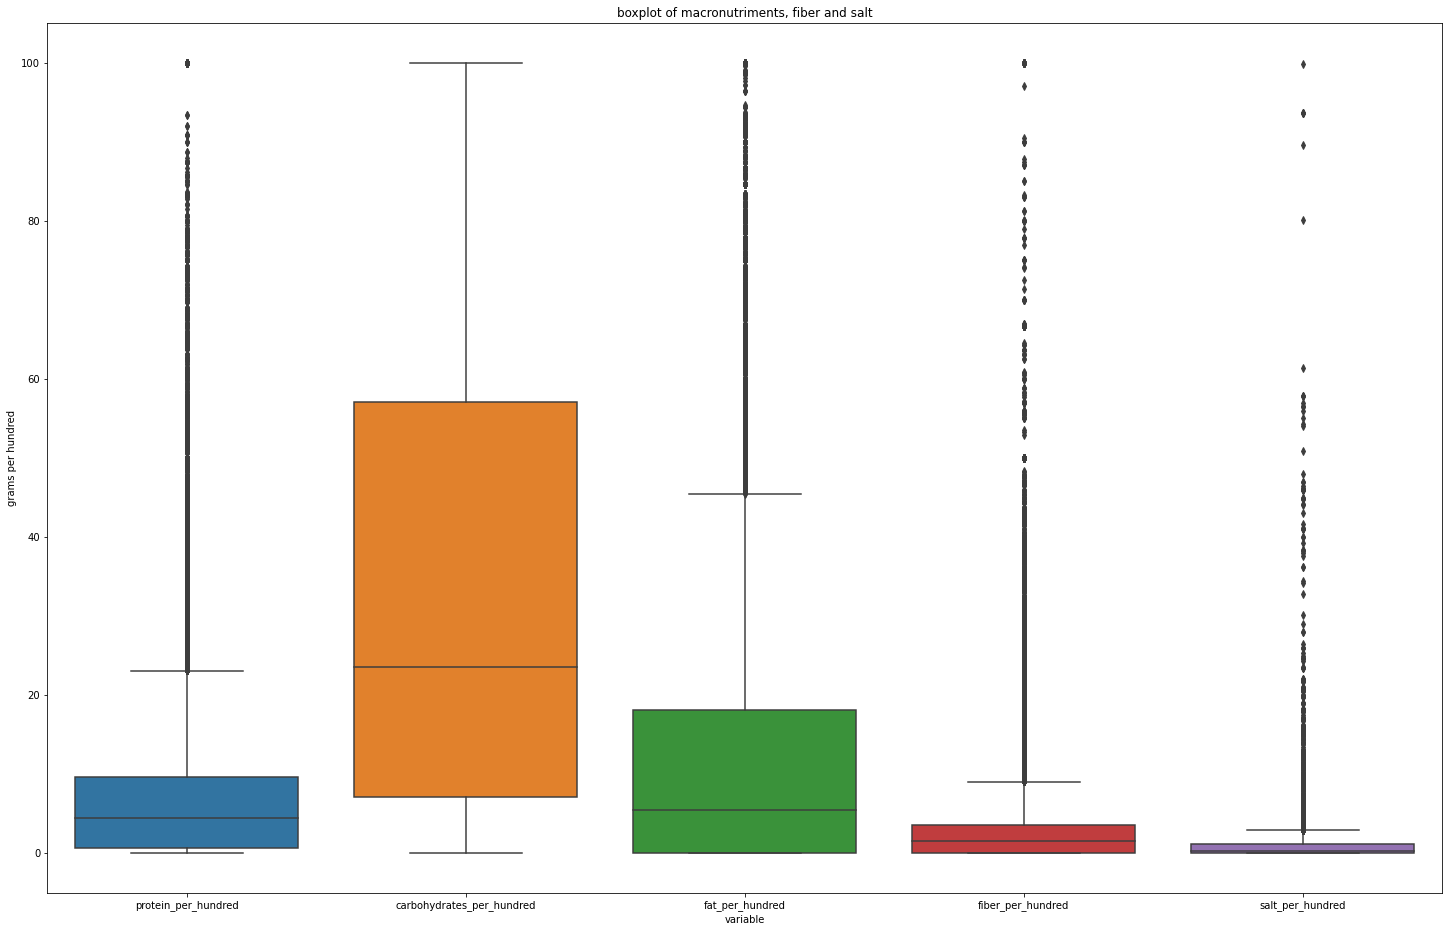

In [87]:
few_per100_df = df_hundreds_with_rangemax[["protein_per_hundred","carbohydrates_per_hundred","fat_per_hundred", "fiber_per_hundred", "salt_per_hundred"]]
fig, ax = plt.subplots()
fig.set_size_inches(25, 16)
boxplot_macrofibsalt = sns.boxplot(x="variable", y="value", data=pd.melt(few_per100_df), ax=ax)
boxplot_macrofibsalt.set(ylabel = "grams per hundred", title="boxplot of macronutriments, fiber and salt")

First, lets study outliers about salt per hundreds . Here i am going to process the z-score values about salt_per_hundred feature,
----------------------------------------------------------------------------------------------------------------------------------

to determine the outliers, for this we need to know the mean and the standard deviation.
---------------------------------------------------------------------------------------- 


In [88]:
feature_name = "salt_per_hundred"
feature_serie = df_hundreds_with_rangemax[feature_name]

mean_serie = np.mean(feature_serie)
std_serie = np.std(feature_serie)
print(f" mean of the serie is {mean_serie} for the feature {feature_name}  "  )
print(f" std. deviation is {std_serie} for the feature {feature_name}  "  )

 mean of the serie is 0.9853348848033513 for the feature salt_per_hundred  
 std. deviation is 3.185654665661081 for the feature salt_per_hundred  


I select the common value of 3.0 for the z-score as the threshold above which entries are discriminate as outliers.

In [89]:
threshold = 3.0
feature_outliers = []

# HERE PLAYS THE DEEP COPY ABOUT PRDUCTS NAMES WE DID AT THE BEGINNING OF THIS PART
name_en = copy_prodnames["product_name_en"]
name_de = copy_prodnames["product_name_de"]
name_fr = copy_prodnames["product_name_fr"]
    
    
i=0
for i in range(0, df_hundreds_with_rangemax.shape[0]):
    cell = feature_serie[i]
    z = (cell - mean_serie)/std_serie
    
    if z >= threshold:
        
        feature_outliers.append(tuple((i, z, cell, name_en[i], name_de[i], name_fr[i],)))

Now we want a sorted list of products, first elements having the most elevated z-score:
----------------------------------------------------------------------------------------

In [90]:
sorted_feature_outliers = sorted(
    #protein_outliers,
    feature_outliers,
    key=lambda t: t[1],
    reverse=True
)

There are too many entries to display, we have to select how much we want, here i will chose one hundred top outliers:
-----------------------------------------------------------------------------------------------------------------------

In [91]:
slice_size = 100

sorted_feature_outliers_100_worst = sorted_feature_outliers[:slice_size]

In [92]:
print("\n row ,      z  ,              value ,  name_en, name_de, name_fr")
print("===== + ================  + ========================== + ========== + - - - - - - - - - - - - - - - - - - - - -")#for elem in sorted_protein_outliers_100_worst:

for outlier in sorted_feature_outliers_100_worst:
    print(outlier)


 row ,      z  ,              value ,  name_en, name_de, name_fr
===== + ================  + ========================== + ========== + - - - - - - - - - - - - - - - - - - - - -
(43159, 31.018636822234093, 99.8, nan, 'Sel des Alpes - Feines Salz', 'Sel des Alpes - Sel fin')
(14618, 29.072412058190693, 93.6, nan, 'A.Vogel : Trocomare : Meersalz mit Gemüse und Kräutern', 'A.Vogel : Trocomare : Sel marin aux légumes et aux fines herbes')
(14620, 29.072412058190693, 93.6, nan, 'A.Vogel : Herbamare : Salat & Gemüse Bio', 'A.Vogel : Herbamare : Salade & légumes Bio')
(18404, 29.072412058190693, 93.6, nan, nan, 'Herbamare - Sel marin aux légumes et herbes aromatiques')
(20165, 29.072412058190693, 93.6, 'Herbamare Sea salt with vegetables and aromatic herbs A.Vogel', 'Herbamare Meersalz mit Gemüse und aromatischen Kräutern', 'Herbamare Sel marin aux légumes et herbes aromatiques A.Vogel')
(14609, 27.81678317816269, 89.6, nan, 'A.Vogel : Herbamare : Spicy Pikant', nan)
(23724, 24.85035994909654

In [93]:
f_text0 = f"<h1><center><strong> We find  that the top outlier about salt per hundred feature is the entry having row index  <font color='red'> {sorted_feature_outliers_100_worst[0][0]} </font> </strong></center></h1>"
f_text1 = f" <h1><center><strong> it contains  <font color='green'> {sorted_feature_outliers_100_worst[0][2]} </font>  g salt per 100 g of product </strong></center></h1>"
f_text2= f" <h1><center><strong> his names is  <font color='blue'> {sorted_feature_outliers_100_worst[0][4]} </font>   in german </strong></center></h1>"
f_text3= f" <h1><center><strong> his z-score as an outlier is  <font color='grey'> {sorted_feature_outliers_100_worst[0][1]} </font> </strong></center></h1>"

f_concat = f_text0 + f_text1 + f_text2 + f_text3

md(f_concat)

<h1><center><strong> We find  that the top outlier about salt per hundred feature is the entry having row index  <font color='red'> 43159 </font> </strong></center></h1> <h1><center><strong> it contains  <font color='green'> 99.8 </font>  g salt per 100 g of product </strong></center></h1> <h1><center><strong> his names is  <font color='blue'> Sel des Alpes - Feines Salz </font>   in german </strong></center></h1> <h1><center><strong> his z-score as an outlier is  <font color='grey'> 31.018636822234093 </font> </strong></center></h1>

0


[Text(0.5, 0, 'feature salt'), Text(0, 0.5, 'content in grams per hundred')]

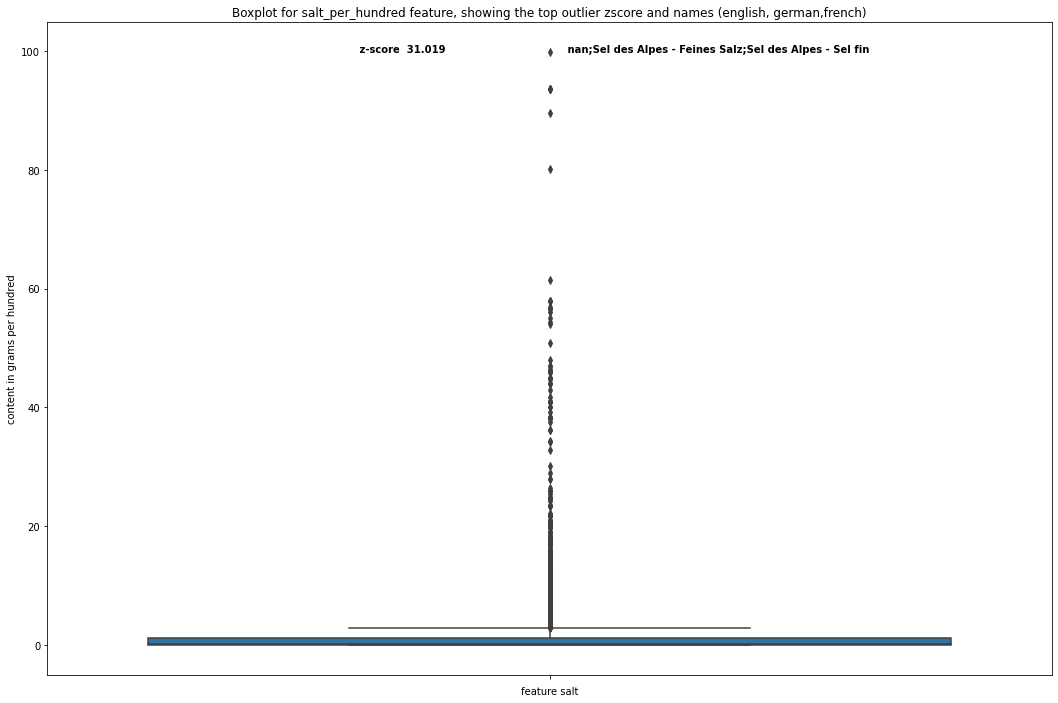

In [94]:
fig, ax = plt.subplots()

fig.set_size_inches(18, 12)

sns_boxplot = sns.boxplot(y= feature_serie, ax=ax)

top_outlier_tuple = sorted_feature_outliers_100_worst[0]
value_top_outlier = top_outlier_tuple[2]

top_outlier_name_en = top_outlier_tuple[3]
top_outlier_name_de = top_outlier_tuple[4]
top_outlier_name_fr = top_outlier_tuple[5]

zscore_top_outlier = top_outlier_tuple[1]

horizontal_offset = 15

vertical_offset = 5

for xtick in sns_boxplot.get_xticks():
    
    print(xtick)    
    
    product_names_txt = sns_boxplot.text(xtick,value_top_outlier,f"     {top_outlier_name_en};{top_outlier_name_de};{top_outlier_name_fr}", 
                     
            horizontalalignment='left', size='medium', color='k', weight='semibold',)
    
    zscore_txt = sns_boxplot.text(xtick - 0.1,value_top_outlier,f"   z-score  {round(zscore_top_outlier,3)} ", 
                     
            horizontalalignment='right', size='medium', color='k', weight='semibold',)
    

sns_boxplot.set_title('Boxplot for salt_per_hundred feature, showing the top outlier zscore and names (english, german,french)')
ax.set(xlabel='feature salt', ylabel='content in grams per hundred')

Now, lets have a look on protein per hundred feature:
-----------------------------------------------------

In [95]:
feature_name = "protein_per_hundred"
feature_serie = df_hundreds_with_rangemax[feature_name]

mean_serie = np.mean(feature_serie)
std_serie = np.std(feature_serie)
print(f" mean of the serie is {mean_serie} for the feature {feature_name}  "  )
print(f" std. deviation is {std_serie} for the feature {feature_name}  "  )

threshold = 3.0
feature_outliers = []
   
i=0
for i in range(0, df.shape[0]):
    cell = feature_serie[i]
    #z = (data[i] - mean)/std
    z = (cell - mean_serie)/std_serie
    
    if z >= threshold:
        
        feature_outliers.append(tuple((i, z, cell, name_en[i], name_de[i], name_fr[i],)))


sorted_feature_outliers = sorted(
    
    feature_outliers,
    key=lambda t: t[1],
    reverse=True
)

slice_size = 100

sorted_feature_outliers_100_worst = sorted_feature_outliers[:slice_size]

print("\nrank      row ,      z  ,             value    , name_en, name_de, name_fr")
print("          ===== + ================ + ======= + ==========/=======/========== + - - - - - - - - - - - - - - - - - - - - - - - -")#for elem in sorted_protein_outliers_100_worst:

rank=0
for outlier in sorted_feature_outliers_100_worst:
    print(rank,"      ", outlier)
    print("______________________________________________________________________________________________________________________________\n")#
    rank += 1

 mean of the serie is 6.961945414078013 for the feature protein_per_hundred  
 std. deviation is 8.355843572914981 for the feature protein_per_hundred  

rank      row ,      z  ,             value    , name_en, name_de, name_fr
          ===== + ================ + ======= + ==========/=======/========== + - - - - - - - - - - - - - - - - - - - - - - - -
0        (76450, 11.134489746493083, 100.0, 'UNFLAVORED GELATIN', nan, nan)
______________________________________________________________________________________________________________________________

1        (76451, 11.134489746493083, 100.0, 'GELATIN', nan, nan)
______________________________________________________________________________________________________________________________

2        (131334, 11.134489746493083, 100.0, 'TCHO, TCHO-A-DAY DARK CHOCOLATE', nan, nan)
______________________________________________________________________________________________________________________________

3        (174542, 11.13448974

In [96]:
f_text0 = f"<h1><center><strong> We find  that the top outlier about Protein per hundred feature is the entry having row index  <font color='red'> {sorted_feature_outliers_100_worst[0][0]} </font> </strong></center></h1>"
f_text1 = f" <h1><center><strong> it contains  <font color='green'> {sorted_feature_outliers_100_worst[0][2]} </font>  g salt per 100 g of product </strong></center></h1>"
f_text2= f" <h1><center><strong> his names is  <font color='blue'> {sorted_feature_outliers_100_worst[0][3]} </font>   in english </strong></center></h1>"
f_text3= f" <h1><center><strong> his z-score as an outlier is  <font color='grey'> {sorted_feature_outliers_100_worst[0][1]} </font> </strong></center></h1>"

f_concat = f_text0 + f_text1 + f_text2 + f_text3

md(f_concat)

<h1><center><strong> We find  that the top outlier about Protein per hundred feature is the entry having row index  <font color='red'> 76450 </font> </strong></center></h1> <h1><center><strong> it contains  <font color='green'> 100.0 </font>  g salt per 100 g of product </strong></center></h1> <h1><center><strong> his names is  <font color='blue'> UNFLAVORED GELATIN </font>   in english </strong></center></h1> <h1><center><strong> his z-score as an outlier is  <font color='grey'> 11.134489746493083 </font> </strong></center></h1>

Lets display it on a graph:
---------------------------

0


[Text(0.5, 0, 'feature protein'), Text(0, 0.5, 'content in grams per hundred')]

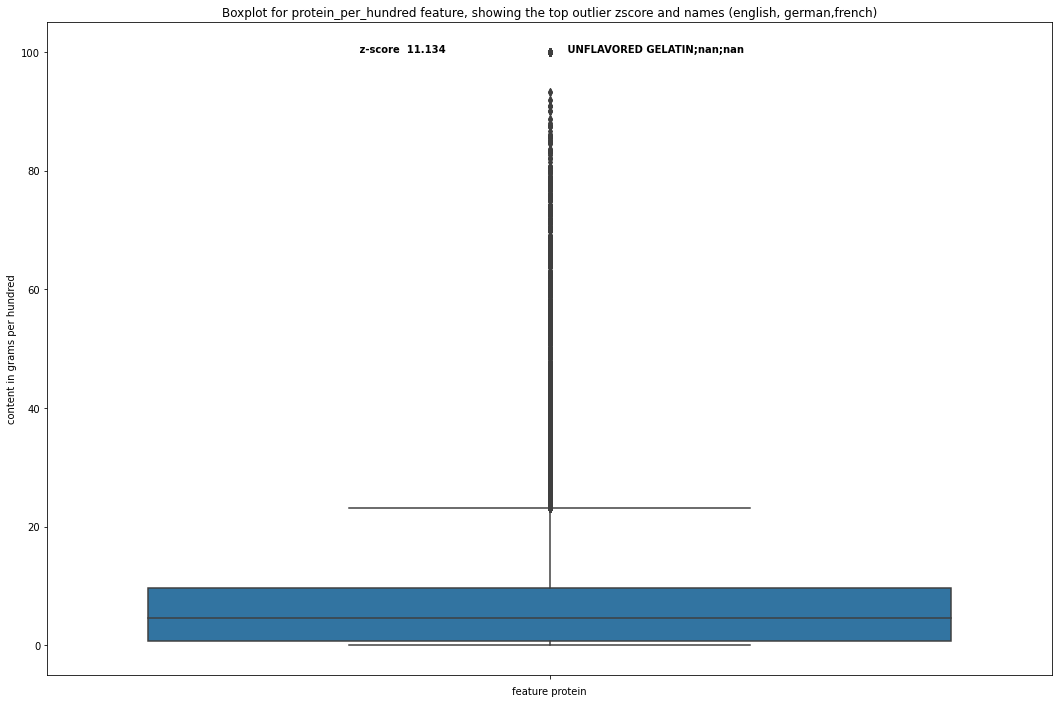

In [97]:
fig, ax = plt.subplots()

fig.set_size_inches(18, 12)


sns_boxplot = sns.boxplot(y= feature_serie, ax=ax)


top_outlier_tuple = sorted_feature_outliers_100_worst[0]
value_top_outlier = top_outlier_tuple[2]

top_outlier_name_en = top_outlier_tuple[3]
top_outlier_name_de = top_outlier_tuple[4]
top_outlier_name_fr = top_outlier_tuple[5]

zscore_top_outlier = top_outlier_tuple[1]

horizontal_offset = 15

vertical_offset = 5

for xtick in sns_boxplot.get_xticks():
    
    print(xtick)    
    
    product_names_txt = sns_boxplot.text(xtick,value_top_outlier,f"     {top_outlier_name_en};{top_outlier_name_de};{top_outlier_name_fr}", 
                     
            horizontalalignment='left', size='medium', color='k', weight='semibold',)
    
    zscore_txt = sns_boxplot.text(xtick - 0.1,value_top_outlier,f"   z-score  {round(zscore_top_outlier,3)} ", 
                     
            horizontalalignment='right', size='medium', color='k', weight='semibold',)
    

sns_boxplot.set_title('Boxplot for protein_per_hundred feature, showing the top outlier zscore and names (english, german,french)')
ax.set(xlabel='feature protein', ylabel='content in grams per hundred')

now we would like to have a zoom on arbitrary rank 86, 87, and 88 : show case
------------------------------------------------------------------------------

 outlier_86     (42434, 9.32737118710001, 84.9, nan, nan, 'Moltein - Ready2Mix Cappuccino')   
   outlier_87   (314199, 9.293861703879475, 84.62, 'CHOCOLATE FLAVOR PLANT BASED PROTEIN POWDER', nan, nan)   
   outlier_88    (342639, 9.280697264042837, 84.51, 'PREMIUM MATCHA LATTE INFUSIONS', nan, nan)   
 value_outlier_86     84.9      value_outlier_87   84.62      value_outlier_88    84.51   
 outlier_86_name_en     nan      outlier_86_name_de   nan      outlier_86_name_fr    Moltein - Ready2Mix Cappuccino   
0


(83.51, 85.9)

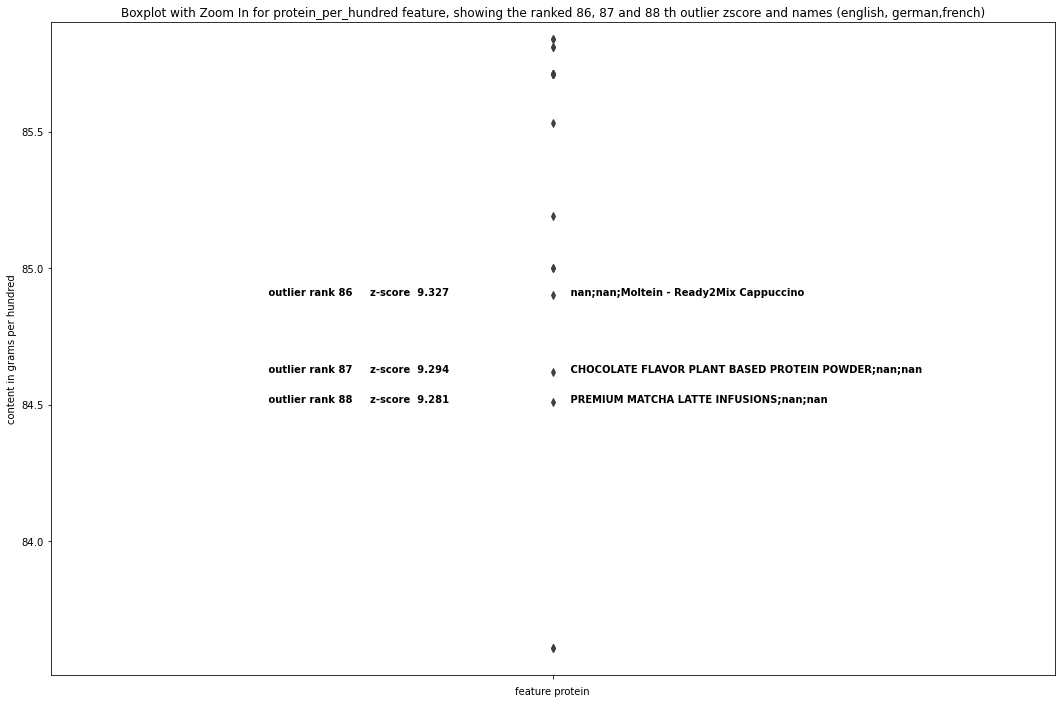

In [98]:
fig, ax = plt.subplots()

fig.set_size_inches(18, 12)


sns_boxplot = sns.boxplot(y= feature_serie, ax=ax)


outlier_86 = sorted_feature_outliers_100_worst[86]
outlier_87 = sorted_feature_outliers_100_worst[87]
outlier_88 = sorted_feature_outliers_100_worst[88]


value_outlier_86 = outlier_86[2]
value_outlier_87 = outlier_87[2]
value_outlier_88 = outlier_88[2]

ylim_sup = value_outlier_86 + 1.0
ylim_inf = value_outlier_88 - 1.0


outlier_86_name_en = outlier_86[3]
outlier_86_name_de = outlier_86[4]
outlier_86_name_fr = outlier_86[5]

outlier_87_name_en = outlier_87[3]
outlier_87_name_de = outlier_87[4]
outlier_87_name_fr = outlier_87[5]

outlier_88_name_en = outlier_88[3]
outlier_88_name_de = outlier_88[4]
outlier_88_name_fr = outlier_88[5]

zscore_outlier_86 = outlier_86[1]
zscore_outlier_87 = outlier_87[1]
zscore_outlier_88 = outlier_88[1]

print(f" outlier_86     {outlier_86}   \n   outlier_87   {outlier_87}   \n   outlier_88    {outlier_88}   ")

print(f" value_outlier_86     {value_outlier_86}      value_outlier_87   {value_outlier_87}      value_outlier_88    {value_outlier_88}   ")

print(f" outlier_86_name_en     {outlier_86_name_en}      outlier_86_name_de   {outlier_86_name_de}      outlier_86_name_fr    {outlier_86_name_fr}   ")

horizontal_offset = 15

vertical_offset = 5

for xtick in sns_boxplot.get_xticks():
    
    print(xtick)    
    
    
    product_names_txt = sns_boxplot.text(0,value_outlier_86,f"     {outlier_86_name_en};{outlier_86_name_de};{outlier_86_name_fr}",
            horizontalalignment='left', size='medium', color='k', weight='semibold',)
    
    zscore_txt = sns_boxplot.text(xtick - 0.1,value_outlier_86,f" outlier rank 86     z-score  {round(zscore_outlier_86,3)} ",
            horizontalalignment='right', size='medium', color='k', weight='semibold',)
    
        #-------------------------
    product_names_txt = sns_boxplot.text(0,value_outlier_87,f"     {outlier_87_name_en};{outlier_87_name_de};{outlier_87_name_fr}",
            horizontalalignment='left', size='medium', color='k', weight='semibold',)
    
    
    zscore_txt = sns_boxplot.text(0 - 0.1,value_outlier_87,f" outlier rank 87     z-score  {round(zscore_outlier_87,3)} ",
            horizontalalignment='right', size='medium', color='k', weight='semibold',)
    #-------------------------
    
    product_names_txt = sns_boxplot.text(0,value_outlier_88,f"     {outlier_88_name_en};{outlier_88_name_de};{outlier_88_name_fr}",
           horizontalalignment='left', size='medium', color='k', weight='semibold',)
    
    zscore_txt = sns_boxplot.text(0 - 0.1,value_outlier_88,f" outlier rank 88     z-score  {round(zscore_outlier_88,3)} ",
            horizontalalignment='right', size='medium', color='k', weight='semibold',)
    

sns_boxplot.set_title('Boxplot with Zoom In for protein_per_hundred feature, showing the ranked 86, 87 and 88 th outlier zscore and names (english, german,french)')
ax.set(xlabel='feature protein', ylabel='content in grams per hundred')

plt.ylim(ylim_inf, ylim_sup)


So we have showed how to adress outliers from datas and how to spot it on graph and even how to give a zoom effect.
--------------------------------------------------------------------------------------------------------------------

Now , to optimize and spare memory RAM usage, we drop useless columns for the following steps of this exercise. We split files and save the dataframe
in "POST_B8_data_385k.pkl" .

In [99]:
excess_cols_names = [colname for colname in df_hundreds_with_rangemax.columns if colname.endswith("excess")]
rangemax_cols_names = [colname for colname in df_hundreds_with_rangemax.columns if colname.endswith("rangemax")]          
fixed_with_nan_cols_names = [colname for colname in df_hundreds_with_rangemax.columns if colname.endswith("fixed_with_nan")]          

#to_drop_columns = [excess_cols_names, rangemax_cols_names, fixed_with_nan_cols_names]

#df_hundreds_with_rangemax.drop([to_drop_columns], axis=1, inplace=True)

df_hundreds_with_rangemax.drop(excess_cols_names, axis=1, inplace=True)
df_hundreds_with_rangemax.drop(rangemax_cols_names, axis=1, inplace=True)
df_hundreds_with_rangemax.drop(fixed_with_nan_cols_names, axis=1, inplace=True)


We will need the columns "product_name_en", "product_name_de", "product_name_fr" we stored in copy_prodnames
-------------------------------------------------------------------------------------------------------------


In [100]:
df_hundreds_with_rangemax["product_name_en"] = copy_prodnames["product_name_en"]
df_hundreds_with_rangemax["product_name_de"] = copy_prodnames["product_name_de"]
df_hundreds_with_rangemax["product_name_fr"] = copy_prodnames["product_name_fr"]


df_hundreds_with_rangemax["ingredients_en"] = copy_ingredients_en

In [101]:
df_hundreds_with_rangemax.to_pickle(path='POST_B8_data_385k.pkl', compression='zip')